<a href="https://colab.research.google.com/github/kskrao219/jovian.ai/blob/main/04_Image_classification%26logistic_regs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('12Re7mwBycYXtv15OzZ7aYMULtegLZ5Jj')

     |████████████████████████████████| 71kB 3.2MB/s 


In [2]:
!pip install jovian --upgrade --quiet

In [ ]:
#DATABASE USED IS MNIST 
# Uncomment and run the appropriate command for your operating system, if required

# Linux / Binder
# !pip install numpy matplotlib torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# Windows
# !pip install numpy matplotlib torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# MacOS
# !pip install numpy matplotlib torch torchvision torchaudio

In [27]:
import torch 
import torchvision
from torchvision.datasets import MNIST

In [28]:
#download training dataset
dataset  = MNIST(root='data/',download=True) #datast is variable

In [29]:
type(dataset)

torchvision.datasets.mnist.MNIST

In [30]:
len(dataset)

60000

In [31]:
test_dataset=MNIST('data/',download=False)
len(test_dataset)

60000

In [32]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FD0D04CD358>, 5)

_**It's a pair, consisting of a 28x28px image and a label. The image is an object of the class PIL.Image.Image, which is a part of the Python imaging library Pillow. We can view the image within Jupyter using matplotlib, the de-facto plotting and graphing library for data science in Python.**_

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

***The statement %matplotlib inline indicates to Jupyter that we want to plot the graphs within the notebook. Without this line, Jupyter will show the image in a popup. Statements starting with % are called magic commands and are used to configure the behavior of Jupyter itself. You can find a full list of magic commands here: https://ipython.readthedocs.io/en/stable/interactive/magics.html .***

***Let's look at a couple of images from the dataset.***

label: 5


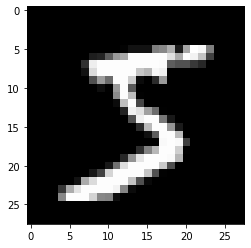

In [34]:
#see image 1
image,label=dataset[0]
plt.imshow(image,cmap='gray')
print('label:',label)

label 3


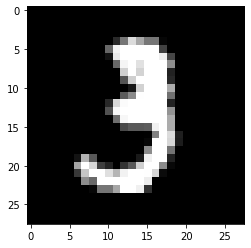

In [35]:
#see image 2
image,label=dataset[10]
plt.imshow(image,cmap='gray')
print("label",label)

In [36]:
#convert images to tensors to work with images in pytorch
import torchvision.transforms as transforms

In [37]:
#mnist dataste (images and labels)
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [38]:
img_tensor , label =dataset[0]
print(img_tensor.shape,label) #0-black/dark ,1-bright/white

torch.Size([1, 28, 28]) 5


In [39]:
img_tensor

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [40]:
print(img_tensor[:,10:15,10:15])#10th row to 15th coloumn
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


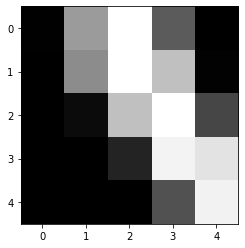

In [41]:
#plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

**Training and Validation Datasets**
While building real-world machine learning models, it is quite common to split the dataset into three parts:

Training set - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
Validation set - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.
Test set - used to compare different models or approaches and report the model's final accuracy.
In the MNIST dataset, there are 60,000 training images and 10,000 test images. The test set is standardized so that different researchers can report their models' results against the same collection of images.

Since there's no predefined validation set, we must manually split the 60,000 images into training and validation datasets. Let's set aside 10,000 randomly chosen images for validation. We can do this using the random_spilt method from PyTorch.

In [45]:
from torch.utils.data import random_split
train_ds,val_ds=random_split(dataset,[50000,10000])
len(train_ds) , len(val_ds)

(50000, 10000)

In [49]:
from torch.utils.data import DataLoader
batch_size = 128
train_loader=DataLoader(train_ds,batch_size,shuffle=True)
val_loader= DataLoader(val_ds,batch_size)

In [47]:
!pip install jovian --upgrade --quiet

In [50]:
import jovian

In [51]:
jovian.commit(project='04_logistic_reg_image_class')

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/kskrao2192000/04-logistic-reg-image-class


'https://jovian.ai/kskrao2192000/04-logistic-reg-image-class'